In [95]:
# we implemented the bigram model using counts and nn
# but the problem is we donot got good results with this model and we took only one char to predict the next
# If we need to take more context to predict (one char 27*27) (take two char 27*27 * 27*27 matrix) and take three (27*27*27 / 27*27*27 matrix)
# so we use multilayer perceptron or neuralnetworks that we are going to implement today
# here we use embeddings of each word in a 30/60/100 dimension space and use backprop to get the each word into same dimension as training occures
import torch
import torch.nn.functional as F
import matplotlib.pyplot as plt
%matplotlib inline

In [109]:
#reading words from the same old file as names.txt
words = open(r'C:\Users\bhara\PycharmProjects\hugging\Dataset\Makemore\Names\names.txt','r').read().splitlines()
words[:10]

['emma',
 'olivia',
 'ava',
 'isabella',
 'sophia',
 'charlotte',
 'mia',
 'amelia',
 'harper',
 'evelyn']

In [110]:
len(words) #total length of words is 32033 
#we build the embedding lookup as 32033 * 30 (dimension depending on the hyperparameter)

32033

In [98]:
#building the itos and stoi dict
chars = sorted(list(set(''.join(words))))
stoi = {s:i+1 for i,s in enumerate(chars)}
stoi['.'] = 0
itos = {i:s for s,i in stoi.items()}
stoi

{'a': 1,
 'b': 2,
 'c': 3,
 'd': 4,
 'e': 5,
 'f': 6,
 'g': 7,
 'h': 8,
 'i': 9,
 'j': 10,
 'k': 11,
 'l': 12,
 'm': 13,
 'n': 14,
 'o': 15,
 'p': 16,
 'q': 17,
 'r': 18,
 's': 19,
 't': 20,
 'u': 21,
 'v': 22,
 'w': 23,
 'x': 24,
 'y': 25,
 'z': 26,
 '.': 0}

In [99]:
#building the dataset
block_size = 4 #after how many words we take so we take 4 words to predict 5th word
X,Y = [],[]
for w in words:
    # print(w)
    context = [0] * block_size
    for ch in w + '.':
        ix = stoi[ch]
        # print(context,ix)
        X.append(context)
        Y.append(ix)
        # print(''.join(itos[i] for i in context), '---->', itos[ix])
        context = context[1:] + [ix] #crop and append
X = torch.tensor(X)
Y = torch.tensor(Y)

In [100]:
X.shape,Y.shape

(torch.Size([228146, 4]), torch.Size([228146]))

In [7]:
X,Y

(tensor([[ 0,  0,  0,  0],
         [ 0,  0,  0,  5],
         [ 0,  0,  5, 13],
         [ 0,  5, 13, 13],
         [ 5, 13, 13,  1],
         [ 0,  0,  0,  0],
         [ 0,  0,  0, 15],
         [ 0,  0, 15, 12],
         [ 0, 15, 12,  9],
         [15, 12,  9, 22],
         [12,  9, 22,  9],
         [ 9, 22,  9,  1],
         [ 0,  0,  0,  0],
         [ 0,  0,  0,  1],
         [ 0,  0,  1, 22],
         [ 0,  1, 22,  1],
         [ 0,  0,  0,  0],
         [ 0,  0,  0,  9],
         [ 0,  0,  9, 19],
         [ 0,  9, 19,  1],
         [ 9, 19,  1,  2],
         [19,  1,  2,  5],
         [ 1,  2,  5, 12],
         [ 2,  5, 12, 12],
         [ 5, 12, 12,  1],
         [ 0,  0,  0,  0],
         [ 0,  0,  0, 19],
         [ 0,  0, 19, 15],
         [ 0, 19, 15, 16],
         [19, 15, 16,  8],
         [15, 16,  8,  9],
         [16,  8,  9,  1]]),
 tensor([ 5, 13, 13,  1,  0, 15, 12,  9, 22,  9,  1,  0,  1, 22,  1,  0,  9, 19,
          1,  2,  5, 12, 12,  1,  0, 19, 15, 16,  8, 

In [8]:
C = torch.randn((27,2)) # we embed the 27 possible chars to 2Dimen
#C is a look up table

In [9]:
C[5]

tensor([0.1670, 0.1970])

In [10]:
# In makemore_1 we did the onehot encoding but this is same as the randn 
# so we are not taking this as this is equivalent to the above
F.one_hot(torch.tensor(5),num_classes=27).float() @ C

tensor([0.1670, 0.1970])

In [11]:
# we index all the X at once
C[X]

tensor([[[ 0.1452,  1.0402],
         [ 0.1452,  1.0402],
         [ 0.1452,  1.0402],
         [ 0.1452,  1.0402]],

        [[ 0.1452,  1.0402],
         [ 0.1452,  1.0402],
         [ 0.1452,  1.0402],
         [ 0.1670,  0.1970]],

        [[ 0.1452,  1.0402],
         [ 0.1452,  1.0402],
         [ 0.1670,  0.1970],
         [-0.0734, -0.9177]],

        [[ 0.1452,  1.0402],
         [ 0.1670,  0.1970],
         [-0.0734, -0.9177],
         [-0.0734, -0.9177]],

        [[ 0.1670,  0.1970],
         [-0.0734, -0.9177],
         [-0.0734, -0.9177],
         [ 1.2892, -0.4194]],

        [[ 0.1452,  1.0402],
         [ 0.1452,  1.0402],
         [ 0.1452,  1.0402],
         [ 0.1452,  1.0402]],

        [[ 0.1452,  1.0402],
         [ 0.1452,  1.0402],
         [ 0.1452,  1.0402],
         [ 1.1939,  1.1132]],

        [[ 0.1452,  1.0402],
         [ 0.1452,  1.0402],
         [ 1.1939,  1.1132],
         [ 0.7108, -0.7028]],

        [[ 0.1452,  1.0402],
         [ 1.1939,  1.1132]

In [12]:
X[10,2]

tensor(22)

In [13]:
C[X][10,2]

tensor([-0.3816, -0.3165])

In [14]:
C[22]

tensor([-0.3816, -0.3165])

In [15]:
embed = C[X]
embed.shape

torch.Size([32, 4, 2])

In [16]:
W1 = torch.randn((8,150))
b1 = torch.randn(150)

In [17]:
embed @ W1 + b1 # so we need to transform 64* 2 to 16*8

RuntimeError: mat1 and mat2 shapes cannot be multiplied (128x2 and 8x150)

In [18]:
torch.cat([embed[:,0,:], embed[:,1,:], embed[:,2,:], embed[:,3,:]], 1).shape
#but it will not generalize later so torch comes to rescure i.e unbind
# we discard cat as this needs/creates new memory

torch.Size([32, 8])

In [19]:
torch.cat(torch.unbind(embed,1),1).shape

torch.Size([32, 8])

In [20]:
a = torch.arange(18)

In [21]:
a.shape

torch.Size([18])

In [22]:
a.view(2,3,3)

tensor([[[ 0,  1,  2],
         [ 3,  4,  5],
         [ 6,  7,  8]],

        [[ 9, 10, 11],
         [12, 13, 14],
         [15, 16, 17]]])

In [23]:
a.storage()

C:\Users\bhara\AppData\Local\Temp\ipykernel_11456\214256462.py:1: UserWarning: TypedStorage is deprecated. It will be removed in the future and UntypedStorage will be the only storage class. This should only matter to you if you are using storages directly.  To access UntypedStorage directly, use tensor.untyped_storage() instead of tensor.storage()
  a.storage()


 0
 1
 2
 3
 4
 5
 6
 7
 8
 9
 10
 11
 12
 13
 14
 15
 16
 17
[torch.storage.TypedStorage(dtype=torch.int64, device=cpu) of size 18]

In [24]:
h = embed.view(-1,8) @ W1 + b1 # we go with embed.view

In [25]:
h

tensor([[ 2.5249, -0.9664, -1.4400,  ..., -2.0244, -0.0728, -2.2309],
        [ 1.6736, -1.7898, -0.2296,  ..., -1.9207, -0.4765, -0.2857],
        [ 0.8992, -2.2461,  1.4593,  ..., -1.0285,  0.4057,  3.6764],
        ...,
        [ 2.9339, -0.7297,  1.1626,  ...,  1.6560,  5.2052, -1.5346],
        [ 2.4416, -2.8279, -0.2738,  ..., -3.1424, -5.8266, -1.1957],
        [-6.0047,  0.4744,  0.2629,  ..., -2.5817, -4.4604,  4.7618]])

In [26]:
h.shape

torch.Size([32, 150])

In [27]:
#final layer
W2 = torch.randn(150,27)
b2 = torch.randn(27)

In [28]:
logits = h @ W2 + b2 #

In [29]:
logits.shape

torch.Size([32, 27])

In [30]:
counts = logits.exp()

In [31]:
prob = counts / counts.sum(1,keepdims = True)

In [32]:
prob

tensor([[2.1861e-37, 9.4945e-19, 5.3656e-27, 5.3072e-32, 2.1125e-23, 6.7494e-29,
         2.8396e-18, 4.7766e-13, 3.4197e-23, 8.4893e-23, 9.6493e-31, 9.4796e-01,
         3.0138e-25, 3.2446e-32, 9.5642e-38, 5.2037e-02, 6.7976e-23, 7.2099e-31,
         9.7436e-21, 3.9934e-35, 1.0602e-26, 2.1412e-29, 1.3280e-10, 1.6165e-36,
         1.5895e-32, 4.4265e-30, 1.2451e-23],
        [5.2356e-34, 6.8038e-22, 8.5068e-29, 4.4260e-35, 1.0264e-21, 1.1461e-30,
         4.5154e-22, 2.6464e-25, 2.0533e-24, 9.1634e-23, 5.6742e-28, 3.4995e-06,
         5.2447e-32, 1.7140e-38, 5.7086e-39, 1.0000e+00, 1.8796e-26, 6.0430e-39,
         4.1400e-20, 2.2393e-42, 6.4102e-35, 2.3531e-27, 8.0459e-21, 0.0000e+00,
         2.3182e-36, 6.5318e-39, 2.7141e-28],
        [6.6801e-18, 8.3451e-22, 1.4454e-25, 9.0853e-34, 1.6688e-08, 1.0924e-25,
         5.1279e-26, 1.3952e-36, 3.6241e-19, 6.0362e-18, 1.5364e-17, 1.0405e-09,
         3.8034e-31, 1.7141e-38, 5.1768e-29, 1.0000e+00, 1.7996e-28, 2.7211e-40,
         7.4082e-

In [33]:
prob.shape

torch.Size([32, 27])

In [34]:
prob[10].sum()

tensor(1.)

In [37]:
loss = -prob[torch.arange(32),Y].log().mean()
loss

tensor(inf)

In [38]:
#now we are again rearanging everything
X.shape, Y.shape

(torch.Size([32, 4]), torch.Size([32]))

In [111]:
g = torch.Generator().manual_seed(2147483647)
C = torch.randn((27,2),generator = g)
W1 = torch.randn((8,150),generator=g)
b1 = torch.randn(150,generator = g)
W2 = torch.randn((150,27),generator=g)
b2 = torch.randn(27,generator=g)
prameters = [C,W1,b2,W2,b2]

In [112]:
sum(p.nelement() for p in prameters) #number of parameters

5358

In [41]:
emb = C[X]
h = torch.tanh(emb.view(-1,8)@W1 + b1)
logits = h@W2 + b2
#classification which is similar to cross_entropy 
counts = logits.exp()
prob = counts/counts.sum(1,keepdims=True)
loss = -prob[torch.arange(32),Y].log().mean()
loss

tensor(17.7180)

In [42]:
#the logits and labels can be given to cross entropy to get the loss
# this is very efficient way instead as of implemting as above counts,prob and loss this is done for understanding purpose and what cross entropy is really mean
# Using the cross entropy function torch clustures the expression and it will be very easy to implement the backward operation too
# So we use the cross_entropy from now on

loss = F.cross_entropy(logits,Y)

tensor(17.7180)

In [46]:
#other problem using the direct function instead of cross entropy is following
# e^1000 = inf and e^-1000 = 0 so this is exploding 
logits = torch.tensor([-1000,-1,0,1000]) # - 1000 #here torch will subtract the highest number from the tensor
counts = logits.exp()
probs = counts/counts.sum()
counts,probs #the nan is a problem here which the crossentropy will solve

(tensor([0., 0., 0., 1.]), tensor([0., 0., 0., 1.]))

In [119]:
for p in prameters:
    p.requires_grad = True

In [120]:
#here we aregoing to get the best learning rate for the model 
learning_rate = torch.linspace(-3,0,1000)
lrs = 10**learning_rate
lrs

tensor([0.0010, 0.0010, 0.0010, 0.0010, 0.0010, 0.0010, 0.0010, 0.0010, 0.0011,
        0.0011, 0.0011, 0.0011, 0.0011, 0.0011, 0.0011, 0.0011, 0.0011, 0.0011,
        0.0011, 0.0011, 0.0011, 0.0012, 0.0012, 0.0012, 0.0012, 0.0012, 0.0012,
        0.0012, 0.0012, 0.0012, 0.0012, 0.0012, 0.0012, 0.0013, 0.0013, 0.0013,
        0.0013, 0.0013, 0.0013, 0.0013, 0.0013, 0.0013, 0.0013, 0.0013, 0.0014,
        0.0014, 0.0014, 0.0014, 0.0014, 0.0014, 0.0014, 0.0014, 0.0014, 0.0014,
        0.0015, 0.0015, 0.0015, 0.0015, 0.0015, 0.0015, 0.0015, 0.0015, 0.0015,
        0.0015, 0.0016, 0.0016, 0.0016, 0.0016, 0.0016, 0.0016, 0.0016, 0.0016,
        0.0016, 0.0017, 0.0017, 0.0017, 0.0017, 0.0017, 0.0017, 0.0017, 0.0017,
        0.0018, 0.0018, 0.0018, 0.0018, 0.0018, 0.0018, 0.0018, 0.0018, 0.0019,
        0.0019, 0.0019, 0.0019, 0.0019, 0.0019, 0.0019, 0.0019, 0.0020, 0.0020,
        0.0020, 0.0020, 0.0020, 0.0020, 0.0020, 0.0021, 0.0021, 0.0021, 0.0021,
        0.0021, 0.0021, 0.0021, 0.0022, 

In [125]:
lri = []
loss_lr = []
# training of this neural network
for i in range(10000):
    # minibatch construct
    ix = torch.randint(0,X.shape[0],(32,))
    # forward pass
    emb = C[X[ix]] #(32,4,2)
    h = torch.tanh(emb.view(-1,8) @ W1 + b1 ) # (32,150)
    logits = h @ W2 + b2 # (32,27)
    loss = F.cross_entropy(logits,Y[ix])
    # print(loss.item())
    #backward pass
    for p in prameters:
        p.grad = None
    loss.backward()
    #update
    # lr = lrs[i]
    lr = 0.01
    for p in prameters:
        p.data += -lr * p.grad
    # tracking stats
    # lri.append(learning_rate[i])
    # loss_lr.append(loss.item())

print(loss.item()) #we are only training of 32 outputs so we are overfitting the model so low loss and great predictions


2.0913288593292236


In [65]:
#but here the main problem is we need to iterate on 224000 examples so we are going to batch
torch.randint(0,X.shape[0],(32,))

tensor([ 13687, 149439,   7940, 134801, 126631, 140011,  79320, 172351,  34867,
         95269, 219300, 145564, 113733,  88367, 115475,  84613,  82469,  20305,
        118382, 211064, 125105, 158518, 132567,  27652, 142853,  26082, 129881,
          9586, 171617, 151366, 167743, 120512])

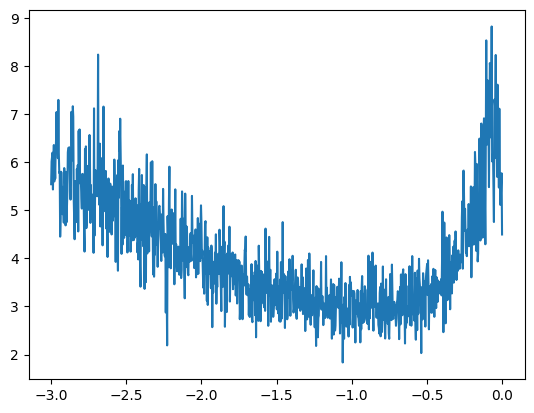

In [122]:
plt.plot(lri,loss_lr)

In [133]:
# the loss is pretty good than makemore_1 bigram model but we are overfitting the model so we are going to divide the model into train/test/valid set
# train,dev/validation and test (80,10,10% of data)
# train - to optimize parametes
# dev - to learn the hyperparameters
# test - to evaluate the performance of model
#building the dataset
def build_dataset(words):
    block_size = 4 #after how many words we take so we take 4 words to predict 5th word
    X,Y = [],[]
    for w in words:
        # print(w)
        context = [0] * block_size
        for ch in w + '.':
            ix = stoi[ch]
            # print(context,ix)
            X.append(context)
            Y.append(ix)
            # print(''.join(itos[i] for i in context), '---->', itos[ix])
            context = context[1:] + [ix] #crop and append
    X = torch.tensor(X)
    Y = torch.tensor(Y)
    print(X.shape,Y.shape)
    return X,Y

import random
random.seed(42)
random.shuffle(words)
n1 = int(0.8*len(words))
n2 = int(0.9*len(words))

X_train,Y_train = build_dataset(words[:n1])
X_dev,Y_dev = build_dataset(words[n1:n2])
X_test, Y_test = build_dataset(words[n2:])

torch.Size([182437, 4]) torch.Size([182437])
torch.Size([22781, 4]) torch.Size([22781])
torch.Size([22928, 4]) torch.Size([22928])


In [168]:
g = torch.Generator().manual_seed(2147483647)
C = torch.randn((27,30),generator = g) 
W1 = torch.randn((120,300),generator=g)
b1 = torch.randn(300,generator = g)
W2 = torch.randn((300,27),generator=g)
b2 = torch.randn(27,generator=g)
prameters = [C,W1,b2,W2,b2]

In [169]:
sum(p.nelement() for p in prameters) #number of parameters

44964

In [170]:
for p in prameters:
    p.requires_grad = True

In [171]:
learning_rate = torch.linspace(-3,0,1000)
lrs = 10**learning_rate
lrs

tensor([0.0010, 0.0010, 0.0010, 0.0010, 0.0010, 0.0010, 0.0010, 0.0010, 0.0011,
        0.0011, 0.0011, 0.0011, 0.0011, 0.0011, 0.0011, 0.0011, 0.0011, 0.0011,
        0.0011, 0.0011, 0.0011, 0.0012, 0.0012, 0.0012, 0.0012, 0.0012, 0.0012,
        0.0012, 0.0012, 0.0012, 0.0012, 0.0012, 0.0012, 0.0013, 0.0013, 0.0013,
        0.0013, 0.0013, 0.0013, 0.0013, 0.0013, 0.0013, 0.0013, 0.0013, 0.0014,
        0.0014, 0.0014, 0.0014, 0.0014, 0.0014, 0.0014, 0.0014, 0.0014, 0.0014,
        0.0015, 0.0015, 0.0015, 0.0015, 0.0015, 0.0015, 0.0015, 0.0015, 0.0015,
        0.0015, 0.0016, 0.0016, 0.0016, 0.0016, 0.0016, 0.0016, 0.0016, 0.0016,
        0.0016, 0.0017, 0.0017, 0.0017, 0.0017, 0.0017, 0.0017, 0.0017, 0.0017,
        0.0018, 0.0018, 0.0018, 0.0018, 0.0018, 0.0018, 0.0018, 0.0018, 0.0019,
        0.0019, 0.0019, 0.0019, 0.0019, 0.0019, 0.0019, 0.0019, 0.0020, 0.0020,
        0.0020, 0.0020, 0.0020, 0.0020, 0.0020, 0.0021, 0.0021, 0.0021, 0.0021,
        0.0021, 0.0021, 0.0021, 0.0022, 

In [172]:
lri = []
loss_lr = []
stepi = []

In [177]:
# training of this neural network
for i in range(200000):
    # minibatch construct
    ix = torch.randint(0,X_train.shape[0],(32,))
    # forward pass
    emb = C[X_train[ix]] #(32,4,2)
    h = torch.tanh(emb.view(-1,120) @ W1 + b1 ) # (32,150)
    logits = h @ W2 + b2 # (32,27)
    loss = F.cross_entropy(logits,Y_train[ix])
    # print(loss.item())
    #backward pass
    for p in prameters:
        p.grad = None
    loss.backward()
    #update
    # lr = lrs[i]
    lr = 0.01
    for p in prameters:
        p.data += -lr * p.grad
    # tracking stats
    stepi.append(i)
    # lri.append(learning_rate[i])
    loss_lr.append(loss.log10().item())

print(loss.item()) #we are only training of 32 outputs so we are overfitting the model so low loss and great predictions


2.585841655731201


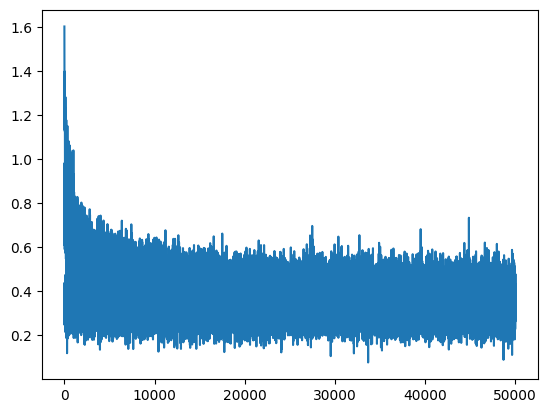

In [178]:
plt.plot(stepi,loss_lr)

In [180]:
emb = C[X_train] #(32,4,2)
h = torch.tanh(emb.view(-1,120) @ W1 + b1 ) # (32,150)
logits = h @ W2 + b2 # (32,27)
loss = F.cross_entropy(logits,Y_train)
loss

tensor(2.1041, grad_fn=<NllLossBackward0>)

In [181]:
emb = C[X_dev] #(32,4,2)
h = torch.tanh(emb.view(-1,120) @ W1 + b1 ) # (32,150)
logits = h @ W2 + b2 # (32,27)
loss = F.cross_entropy(logits,Y_dev)
loss

tensor(2.2101, grad_fn=<NllLossBackward0>)

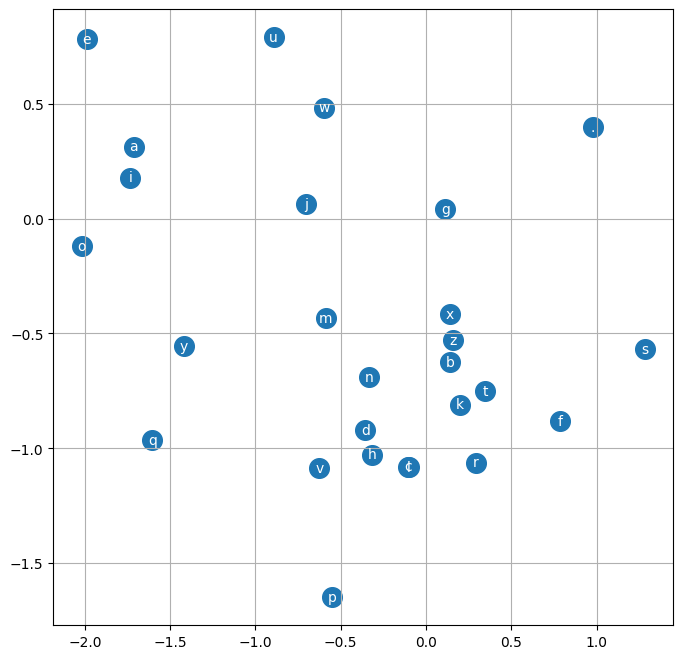

In [182]:
plt.figure(figsize=(8,8))
plt.scatter(C[:,0].data,C[:,1].data,s=200)
for i in range(C.shape[0]):
    plt.text(C[i,0].item(),C[i,1].item(),itos[i],ha="center",va="center",color="white")
plt.grid('minor')

In [183]:
emb = C[X_test] #(32,4,2)
h = torch.tanh(emb.view(-1,120) @ W1 + b1 ) # (32,150)
logits = h @ W2 + b2 # (32,27)
loss = F.cross_entropy(logits,Y_test)
loss

tensor(2.1957, grad_fn=<NllLossBackward0>)

In [186]:
#sampling from the model
g = torch.Generator().manual_seed(2147483747 + 10)

for _ in range(30):

    out = []
    context = [0] * block_size # beign with all .........
    while True:
        emb = C[torch.tensor([context])] #(1,block_size,d) 
        h = torch.tanh(emb.view(1,-1) @ W1 + b1)
        logits = h@W2 + b2
        probs = F.softmax(logits,dim=1) #to calculate the probs exp and sum to 1 and no overflows
        ix = torch.multinomial(probs,num_samples=1,generator=g).item() #sample from 
        context = context[1:] + [ix]
        out.append(ix)
        if ix==0:
            break
    print(''.join(itos[i] for i in out))

lori.
jaedin.
kelseline.
nazal.
menoa.
smiliana.
marvanylia.
jae.
broania.
emico.
tonean.
deycen.
syrric.
denson.
deilison.
biella.
rolindy.
madalea.
dage.
cseez.
isac.
tesia.
ayaline.
kamyar.
triona.
etdri.
dora.
jirrick.
diamon.
jera.
